# Execution Time Analysis for Logistic Regression Training with Replicated Data
This notebook analyzes the execution times from `08_replicated_data_spark_logistic_regression_food_inspections` to provide comparisons between:

1. A from-scratch Python implementation which uses looping to compute gradients on individual samples
2. A from-scratch Spark implementation which leverages distributed map and reduce operations to compute gradients on individual samples
3. The Spark MLlib implementation of Logistic Regression

**Notes:**

1. Logistic Regression Algorithm for Spark RDD from M. Zaharia, M. Chowdhury, T. Das, A. Dave, J. Ma, M. McCauley, M. J. Franklin, S. Shenker, and I. Stoica. Resilient distributed datasets: A fault-tolerant abstraction for in-memory cluster computing. In Proceedings of NSDI, pages 15–28, 2012.
2. Raw Python Version based on https://github.com/jstremme/l2-regularized-logistic-regression but without regularization and vectorization of matrix operations.  Instead `py_lr_grad_descent` computes the gradient on each sample sequentially, unlike Spark which will compute the gradient on each sample but in parallel.
3. Spark MLlib: https://spark.apache.org/docs/latest/ml-guide.html.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Record Fit Times by Instance

In [2]:
fit_times_df = pd.DataFrame(
    {'instances': [2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8],
     'scratch_python_fit_time_seconds': [60*6 + 17, 60*5 + 40, 60*5 + 47, 60*5 + 55, 60*5 + 41, 60*7 + 21, 60*6 + 22, 60*6 + 36, 60*6 + 49, 60*6 + 29, 99, 99, 99, 99, 99],
     'scratch_spark_fit_time_seconds': [60*4 + 34, 60*4 + 29, 60*4 + 29, 60*4 + 31, 60*4 + 40, 60*2 + 50, 60*2 + 47, 60*2 + 47, 60*2 + 46, 60*2 + 44, 99, 99, 99, 99, 99],
     'mllib_spark_fit_time_seconds': [60*1 + 48, 60*1 + 40, 60*1 + 35, 60*1 + 56, 60*1 + 30, 55, 49, 58, 55, 60, 99, 99, 99, 99, 99]
    })

### Create Plotting Functions

In [3]:
def mean_r(x):
    return round(np.mean(x), 3)

In [4]:
def min_r(x):
    return round(min(x), 3)

In [5]:
def max_r(x):
    return round(max(x), 3)

In [6]:
def plot_mean_times(mean_times, algos, title, color):
    
    plt.clf()
    
    plt.figure(figsize=(6,6))
    ypos = range(len(algos))
    plt.barh(ypos, mean_times, color=color)

    plt.title(title)
    plt.yticks(ypos, algos)
    plt.ylabel('AWS m5.xlarge Instances')
    plt.xlabel('Execution Time (Seconds) - Mean of 5 Runs')
    
    plt.show()

### Split Data by Number of Instances

In [7]:
two_instance_df = fit_times_df[fit_times_df['instances'] == 2]
four_instance_df = fit_times_df[fit_times_df['instances'] == 4]

### Compute Summary Statistics

In [8]:
all_algos = ['Scratch Sequential Python - 2 Instances', 'Scratch Spark - 2 Instances', 'MLlib Spark - 2 Instances',
             'Scratch Sequential Python - 4 Instances', 'Scratch Spark - 4 Instances', 'MLlib Spark - 4 Instances']

In [9]:
all_times = [two_instance_df['scratch_python_fit_time_seconds'].tolist(),
             two_instance_df['scratch_spark_fit_time_seconds'].tolist(),
             two_instance_df['mllib_spark_fit_time_seconds'].tolist(),
             four_instance_df['scratch_python_fit_time_seconds'].tolist(),
             four_instance_df['scratch_spark_fit_time_seconds'].tolist(),
             four_instance_df['mllib_spark_fit_time_seconds'].tolist()]

In [10]:
mean_times = list(map(mean_r, all_times))
min_times = list(map(min_r, all_times))
max_times = list(map(max_r, all_times))

In [11]:
summary_df = pd.DataFrame(
        {'Algorithm': all_algos,
         'Mean': mean_times,
         'Min': min_times,
         'Max': max_times,
        })

In [12]:
summary_df

,Algorithm,Mean,Min,Max
0,Scratch Sequential Python - 2 Instances,352.0,340,377
1,Scratch Spark - 2 Instances,272.6,269,280
2,MLlib Spark - 2 Instances,101.8,90,116
3,Scratch Sequential Python - 4 Instances,403.4,382,441
4,Scratch Spark - 4 Instances,166.8,164,170
5,MLlib Spark - 4 Instances,55.4,49,60


### Plot Mean Times by Algorithm Type

In [13]:
algos = ['2 Nodes', '4 Nodes', '8 Nodes']

<Figure size 432x288 with 0 Axes>

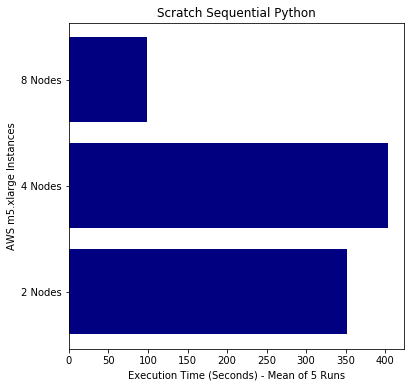

In [14]:
means = [352.0, 403.4, 99]
plot_mean_times(means, algos, title='Scratch Sequential Python', color='navy')

<Figure size 432x288 with 0 Axes>

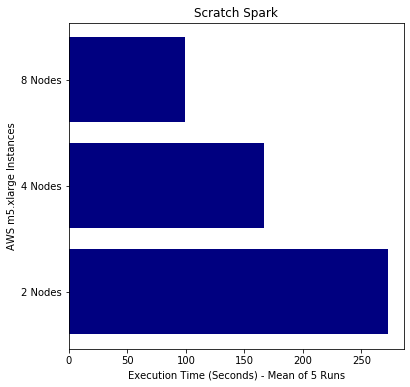

In [15]:
means = [272.6, 166.8, 99]
plot_mean_times(means, algos, title='Scratch Spark', color='navy')

<Figure size 432x288 with 0 Axes>

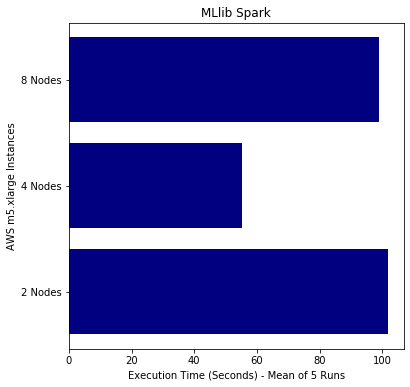

In [16]:
means = [101.8, 55.4, 99]
plot_mean_times(means, algos, title='MLlib Spark', color='navy')